In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
orig_df = pd.read_csv('../out/features.csv', index_col=0)
print(len(orig_df))

orig_df = orig_df.fillna(0)
orig_df['Name (unique)'] = orig_df.index
orig_df = orig_df.drop_duplicates(subset = 'Name (unique)')

print(len(orig_df))


6869
6869


In [3]:
all_df = pd.read_csv('../out/a_format_data/all_stepcharts.csv', index_col=0)
all_df['Level'] = all_df['METER']

df = orig_df.merge(all_df, on = 'Name (unique)', how = 'left')
print(len(df))

6869


In [4]:
df['Is doubles'] = (df['Steptype simple'].str.contains('D'))
doubles_df = df[df['Is doubles']]

doubles_df.shape

(2584, 438)

In [5]:
df = doubles_df

### columns

In [8]:
stat_cols = [col for col in df.columns if ' - frequency' in col]

for col in stat_cols:
    print(col.replace(' - frequency', ''))

Hold
Hold taps
Splits
Jump
Bracket
Double step
Footswitch
Jack
Bracket footswitch
Hold tap single foot
Hold footslide
Hold footswitch
Staggered hit
Hands
Drill
Run
Hold run
Bracket drill
Irregular rhythm
Bracket jump run
Side3 singles
Mid4 doubles
Mid6 doubles
Run with brackets
Jump run
Stairs, singles
Stairs, doubles
Broken stairs, doubles
Spin
Twist solo diagonal
Twist angle - none
Twist angle - 90
Twist angle - close diagonal
Twist angle - far diagonal
Twist angle - 180


### explore

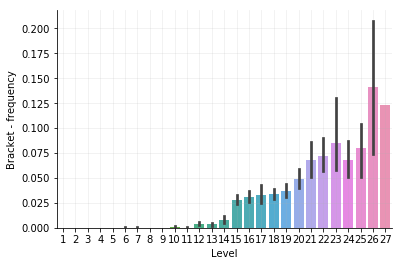

In [16]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

stat = 'Bracket - frequency'

sns.barplot(
    x = 'Level',
    y = stat,
#     data = df[(0 < df[stat]) & (df[stat] < 50)],
    data = df[(df[stat] < 50)],
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)

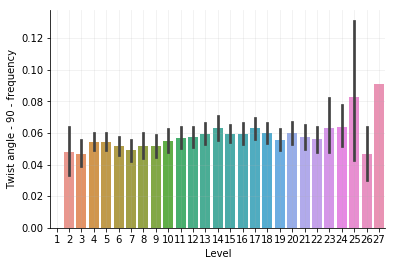

In [17]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

stat = 'Twist angle - 90 - frequency'

sns.barplot(
    x = 'Level',
    y = stat,
#     data = df[(0 < df[stat]) & (df[stat] < 50)],
    data = df[(df[stat] < 50)],
    ax = ax,
)


sns.despine()
plt.grid(alpha=0.2)

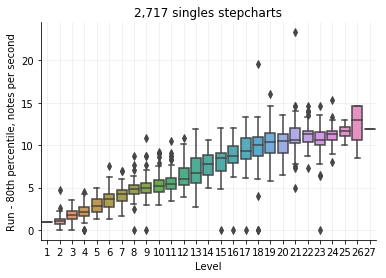

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

sns.boxplot(
    x = 'Level',
    y = 'Run - 80% nps',
    data = df,
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)

plt.ylabel('Run - 80th percentile, notes per second');
plt.title(f'{len(df):,} singles stepcharts');

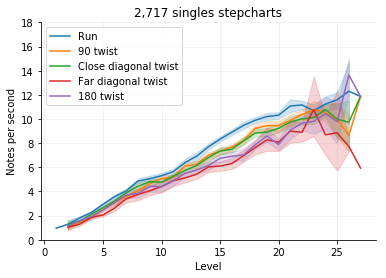

In [20]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

#

nm_to_stat = {
    'Run': 'Run - 80% nps',
    '90 twist': 'Twist angle - 90 - 80% nps',
    'Close diagonal twist': 'Twist angle - close diagonal - 80% nps',
    'Far diagonal twist': 'Twist angle - far diagonal - 80% nps',
    '180 twist': 'Twist angle - 180 - 80% nps',
}
for nm, stat in nm_to_stat.items():
    dfs = df[(0 < df[stat]) & (df[stat] < 50)]

    sns.lineplot(
        x = 'Level',
        y = stat,
        data = dfs,
        ax = ax,
        label = nm,
    )
    
sns.despine()
plt.grid(alpha=0.2)

plt.ylim(bottom = 0, top=18)

plt.ylabel('Notes per second');
plt.title(f'{len(df):,} singles stepcharts');

### sort charts by ...


In [28]:
# Mid

crit = (df['Level'] >= 13)

col = 'Mid4 doubles - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Mid4 doubles - frequency
6436,Kasou Shinja - MAX HD21 shortcut,21,1.000000
1140,Trashy Innocence - Last Note. D16 arcade,16,1.000000
4375,Shub Niggurath - Nato D17 arcade,17,1.000000
4807,Can-can ~Orpheus in The Party Mix~ - SHORT CUT...,13,0.995238
5734,Silhouette Effect - Nato D17 shortcut,17,0.792614
5230,Be Alive (Raaban Inc. Mix) - Stian K D16 arcade,16,0.783599
1958,Allegro Furioso - DM Ashura D14 arcade,14,0.749474
4680,Love is a Danger Zone pt. 2 - BanYa D23 arcade,23,0.721557
6589,PRIME - Tatsh D16 arcade,16,0.706000
4279,Sarabande - MAX D17 shortcut,17,0.680982


In [12]:
# Mid

crit = (df['Level'] <= 13) & (df['Level'] >= 10) & (df['Mid6 doubles - frequency'] == 1)

col = 'Mid6 doubles - frequency'

subcols = ['Name (unique)', 'Level', col]

df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:80]

print(list(df[crit]['Name (unique)']))

['Mr. Larpus - BanYa HD12 arcade', 'Handsome Character That Pass - May HD12 arcade', 'Hardkore Atomic - Diclonius Kid HD12 arcade', "What's Goin On - Turtles HD10 arcade", 'Do What You Wanna Do - Playmaker HD11 arcade', 'Loki - Lotze D12 arcade', 'London Bridge - SCI Guyz HD10 arcade', 'Renai Yuusha - Last Note. D13 arcade', 'Switronic - SHK D10 arcade', 'Get Up! - BanYa HD11 arcade', 'Dawn (Perpetual Mix) - KaW HD10 arcade', 'Y2Z - Affinity HD10 arcade', '! - Onyx HD11 arcade', 'Ladybug - Coconut D13 arcade v1', 'Love is a Danger Zone (try To B.P.M.) - BanYa HD11 remix', 'Witch Doctor #1 - YAHPP HD13 arcade', 'Beat of The War 2 - BanYa HD11 arcade', 'Virtual Emotion - Inspector K HD12 arcade', 'Another Truth - Novasonic HD10 arcade', 'Burning Krypt - B Legit, 2Wice & 4Tray HD11 arcade', 'Deja Vu - SOM2 HD13 arcade', 'Elder God Shrine - E-Racer HD12 arcade', 'Monkey Magic - E-PAK-SA HD11 arcade', 'Rock Robotic -OSX Mix- - Oscillator X HD12 arcade', "It's My Business - Taiji & Boys HD13

In [43]:
# 180

crit = (df['Level'] >= 13)

col = 'Twist angle - 180 - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Twist angle - 180 - frequency
102,Can Can - F2 Original D15 arcade,15,0.054726
1680,Trash Man - N.EX.T D15 arcade,15,0.034483
5178,Dr. M - BanYa HD13 arcade hidden,13,0.032483
305,Coming Out - Playmaker feat. Robin HD14 arcade,14,0.029491
602,Master of Puppets - Metallica D14 arcade hidden,14,0.027837
1592,Fiesta - El Cuba D13 arcade,13,0.026866
2546,Csikos Post - Banya D15 arcade hidden,15,0.026643
159,For You - N.Ex.T D13 arcade,13,0.025157
5722,Handsome Character That Pass - May D15 arcade,15,0.022727
1005,Monolith - Affinity D14 arcade v2,14,0.021654


In [30]:
dfs = df[crit]

num_half = sum(dfs['Mid6 doubles - frequency'] == 1)
print(num_half, len(dfs), num_half / len(dfs))

117 1425 0.08210526315789474


In [6]:
# Spin

crit = (df['Level'] >= 13)

col = 'Spin - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Spin - frequency
5440,Can-can ~Orpheus in The Party Mix~ - SHORT CUT...,19,0.121495
2128,Break Out - Lunatic Sounds D22 arcade,22,0.058252
4425,Red Swan - Yahpp D20 arcade,20,0.056911
2555,Ugly Duck Toccata - Banya Production D16 remix,16,0.051805
4333,Go Away - BMK D15 arcade,15,0.050761
978,Turn Around - Mina D13 arcade,13,0.048232
5126,msgoon RMX pt.3 - msgoon D20 remix,20,0.046697
2998,Scorpion King - r300k D16 arcade,16,0.041946
22,Love Is A Danger Zone (Cranky Mix) - BanYa & C...,23,0.038667
4374,Enhanced Reality - Matduke D20 arcade,20,0.037244


## train model

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
# model = GradientBoostingRegressor()

nms = list(df['Name (unique)'])
sctypes = []
for typ in ['arcade', 'fullsong', 'shortcut', 'remix']:
    sctype = f'Stepchart - {typ}'
    sctypes.append(sctype)
    df[sctype] = [int(bool(typ in nm)) for nm in nms]

ft_cols = [x for x in orig_df.columns if x != 'Name (unique)'] + sctypes
x = np.array(df[ft_cols])
y = np.array(df['Level'])

model = HistGradientBoostingRegressor(monotonic_cst = [1]*x.shape[-1])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

0.9502473729393826


/home/maxwshen/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


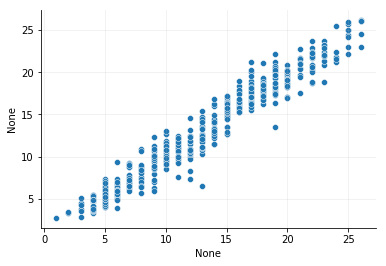

In [33]:
model.fit(x_train, y_train)

print(model.score(x_test, y_test))

pred_y_test = model.predict(x_test)

sns.scatterplot(y_test, pred_y_test)
sns.despine()
plt.grid(alpha=0.2)

In [34]:
# Train on entire dataset

model.fit(x, y)
print(model.score(x, y))

pred_level = model.predict(x)
resid = pred_level - y

df['Predicted level'] = pred_level
df['Residual'] = resid

0.9736512857324047


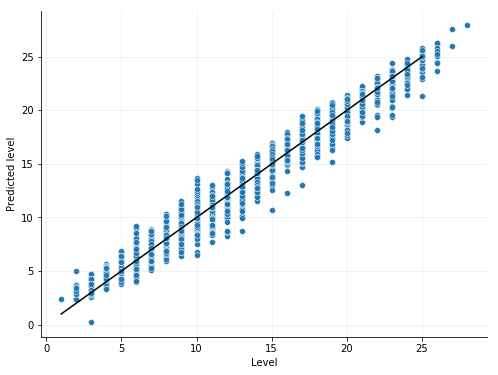

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
#

sns.scatterplot(
    x = 'Level',
    y = 'Predicted level',
    data = df,
)
sns.despine()
plt.grid(alpha=0.2, markevery=1)

# plt.xticks(np.arange(0, 25, 1));
# plt.yticks(np.arange(0, 25, 1));

plt.plot([1, 25], [1, 25], '-', color='black')

In [36]:
# Most misrated charts

df['Residual abs'] = np.abs(df['Residual'])
subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual', 'Residual abs']
df.sort_values(by = 'Residual abs', ascending=False)[subcols].iloc[:15]

,Name (unique),Level,Predicted level,Residual,Residual abs
4422,NoNoNo - Apink DP15 arcade,15,10.694031,-4.305969,4.305969
158,For You - N.Ex.T D13 arcade,13,8.762342,-4.237658,4.237658
3752,Another Truth - Novasonic D17 arcade,17,13.066026,-3.933974,3.933974
6661,Pumptris 8Bit ver. - YAHPP D22 shortcut,22,18.149972,-3.850028,3.850028
5411,Can-can ~Orpheus in The Party Mix~ - SHORT CUT...,19,15.220444,-3.779556,3.779556
5501,A.U Ready - Gil Gun D16 arcade,16,12.241083,-3.758917,3.758917
60,Hardkore Atomic - Diclonius Kid HD12 arcade,12,8.256420,-3.743580,3.743580
5562,Will-O-The-Wisp - BanYa HD10 arcade,10,13.718640,3.718640,3.718640
1501,Can-can ~Orpheus in The Party Mix~ - SHORT CUT...,23,19.345815,-3.654185,3.654185
3112,Mr. Larpus - BanYa D25 arcade,25,21.355664,-3.644336,3.644336


In [37]:
# Charts pred. harder than their listed level > 16

subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
df[df['Level'] >= 16].sort_values(by = 'Residual', ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Predicted level,Residual
3247,Stardust Overdrive - typeMARS D17 shortcut,17,19.493613,2.493613
2746,Love is a Danger Zone pt. 2 - BanYa D17 arcade,17,19.138707,2.138707
2511,UFO Catcher - Initial P D18 arcade,18,20.095015,2.095015
2544,Anguished Unmaking - void D18 arcade,18,20.038599,2.038599
2451,NX Opening - YAHPP D17 shortcut,17,19.013017,2.013017
1072,Unique - SHK D16 shortcut,16,17.970368,1.970368
6800,PRIME2 Opening - MAX D18 shortcut,18,19.944195,1.944195
206,Witch Doctor - Banya D17 shortcut,17,18.824569,1.824569
6829,Energizer - Zig Zag D17 arcade,17,18.800594,1.800594
5389,Hello - BanYa D16 arcade,16,17.794190,1.794190


In [38]:
# Pred. level by labeled level

subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
lvl = 17
display(df[df['Level'] == lvl].sort_values(by = 'Predicted level', ascending=False)[subcols].iloc[:20])
display(df[df['Level'] == lvl].sort_values(by = 'Predicted level', ascending=True)[subcols].iloc[:20])

,Name (unique),Level,Predicted level,Residual
3247,Stardust Overdrive - typeMARS D17 shortcut,17,19.493613,2.493613
2746,Love is a Danger Zone pt. 2 - BanYa D17 arcade,17,19.138707,2.138707
2451,NX Opening - YAHPP D17 shortcut,17,19.013017,2.013017
206,Witch Doctor - Banya D17 shortcut,17,18.824569,1.824569
6829,Energizer - Zig Zag D17 arcade,17,18.800594,1.800594
2938,VVV - ZiGZaG D17 arcade,17,18.584283,1.584283
1126,I Want U - MAX D17 arcade,17,18.572004,1.572004
765,Ignis Fatuus(DM Ashura Mix) - BanYa & DM Ashur...,17,18.567194,1.567194
5734,Silhouette Effect - Nato D17 shortcut,17,18.550089,1.550089
4456,Chicken Wing - BanYa D17 arcade,17,18.451023,1.451023


,Name (unique),Level,Predicted level,Residual
3752,Another Truth - Novasonic D17 arcade,17,13.066026,-3.933974
604,Tales of Pumpnia - Applesoda D17 arcade,17,14.719366,-2.280634
4102,Big metra Remix - Big metra D17 remix,17,15.061705,-1.938295
4310,Do It Yourself - LazyBone D17 arcade,17,15.186471,-1.813529
38,RUN! - Novasonic D17 arcade,17,15.202103,-1.797897
3235,Deja Vu - SOM2 D17 arcade hidden,17,15.206876,-1.793124
1893,Starian - DUKE D17 arcade,17,15.414380,-1.585620
5263,Monkey Fingers - BanYa D17 arcade,17,15.559508,-1.440492
1018,NUMBER NINE - T-ARA D17 arcade,17,15.758535,-1.241465
2278,Take It Off - Alex D17 arcade,17,15.782632,-1.217368
